# Principal Component Analysis

## import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [32]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

In [33]:
print(number_data, number_feature)

50 2


## plot the input data

In [34]:
Z = np.c_[x, y]

In [35]:
Z.shape

(50, 2)

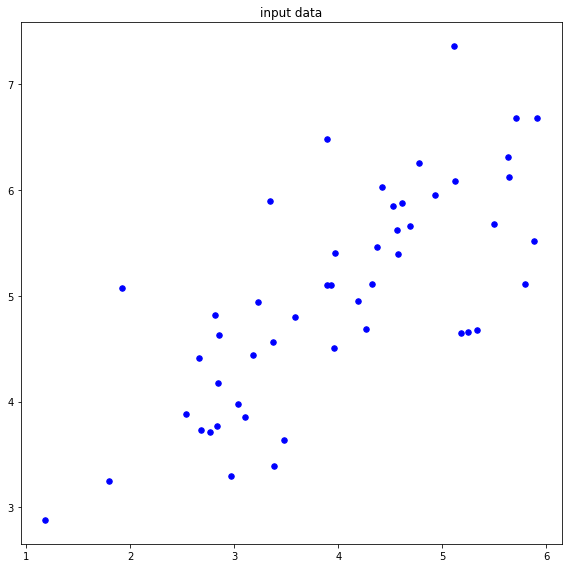

In [36]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

In [38]:
np.mean(x)

3.9892652

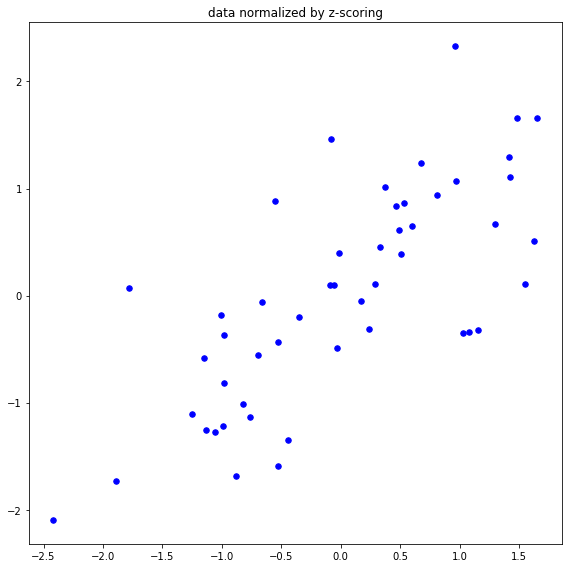

In [45]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')

x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)
Z = np.c_[x, y]

plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')

plt.tight_layout()
plt.show()

In [47]:
print("mean of x =", np.mean(x))
print("mean of y =", np.mean(y))
print("std of x =", np.std(x))
print("std of y =", np.std(y))

mean of x = -2.220446049250313e-18
mean of y = -8.881784197001253e-18
std of x = 1.0
std of y = 1.0


## compute covariance matrix

In [64]:
Z.shape

(50, 2)

In [51]:
def compute_covariance(Z):
    
    Sigma = 1 / len(Z) * np.dot(Z.T,Z)
    
    return Sigma

In [65]:
compute_covariance(Z)

array([[1.     , 0.73553],
       [0.73553, 1.     ]])

## compute principal directions

In [62]:
def compute_eigen(X):
    S, U = np.linalg.eig(X)
    return S, U

In [132]:
S, U = compute_eigen(compute_covariance(Z))
S, U

(array([1.73553, 0.26447]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [133]:
scaled_U =  np.c_[S[0] * U[:,0], S[1] * U[:,1]]

In [134]:
scaled_U

array([[ 1.22720503, -0.18700853],
       [ 1.22720503,  0.18700853]])

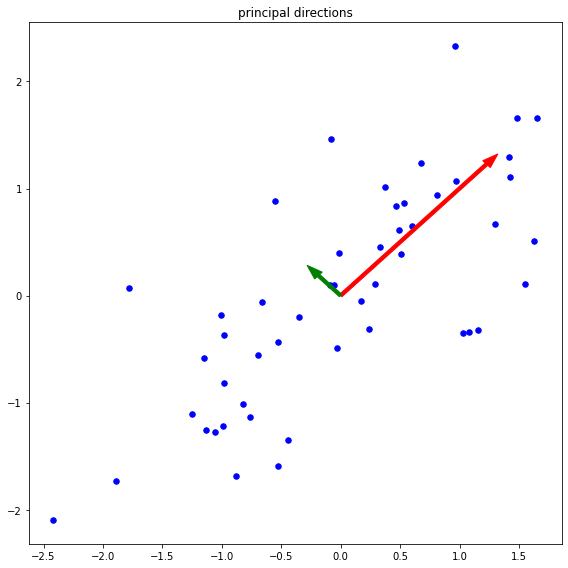

In [150]:
plt.figure(figsize=(8,8))
plt.title('principal directions')

plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')

#o = np.array([[0,0],[0,0]])
#plt.quiver(*o, scaled_U[0], scaled_U[1], color=['r','g'])

plt.arrow(0, 0, scaled_U[0][0], scaled_U[1][0], color='r', width = 0.03)
plt.arrow(0, 0, scaled_U[0][1], scaled_U[1][1], color='g', width = 0.03)

plt.tight_layout()

plt.show()

## first principal axis

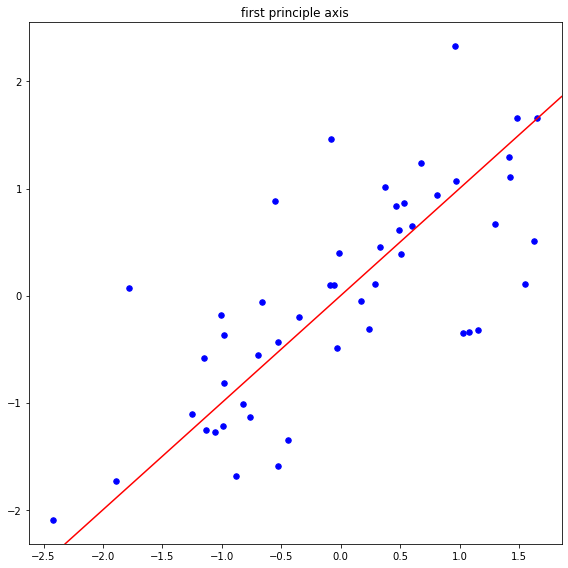

In [164]:
plt.figure(figsize=(8,8))
plt.title('first principle axis')

plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')
plt.axline((0,0), scaled_U[:,0], color='r')
           
plt.plot()

plt.tight_layout()
plt.show()

## second principal axis

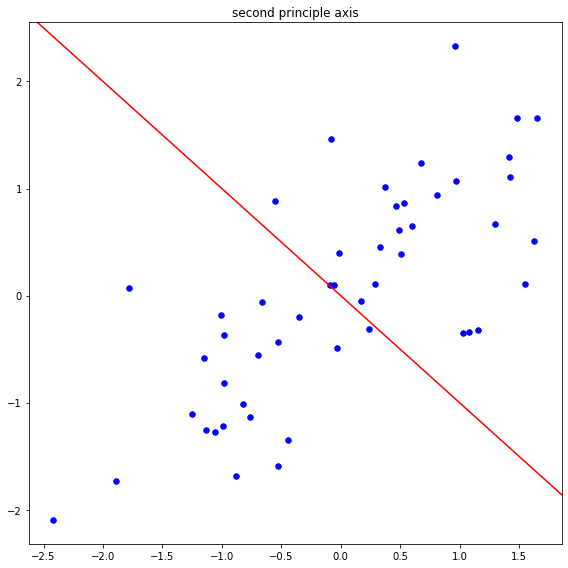

In [165]:
plt.figure(figsize=(8,8))
plt.title('second principle axis')

plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')
plt.axline((0,0), scaled_U[:,1], color='r')
           
plt.plot()

plt.tight_layout()
plt.show()

## compute the projection of point onto the line

In [210]:
def compute_projection_onto_line(feature, vector):

    vector_norm = np.sqrt(sum(vector**2))
    projection = np.zeros(shape=(50,2))
    for i in range(len(feature)):
        proj = (np.dot(feature[i], vector)/vector_norm**2) * vector
        projection[i] = proj
        
    return projection

In [176]:
(np.dot(Z, scaled_U[:,0])/np.sqrt(sum(scaled_U[:,0]**2))).shape

(50,)

In [170]:
scaled_U[:,0].shape

(2,)

## project to the first principal axis

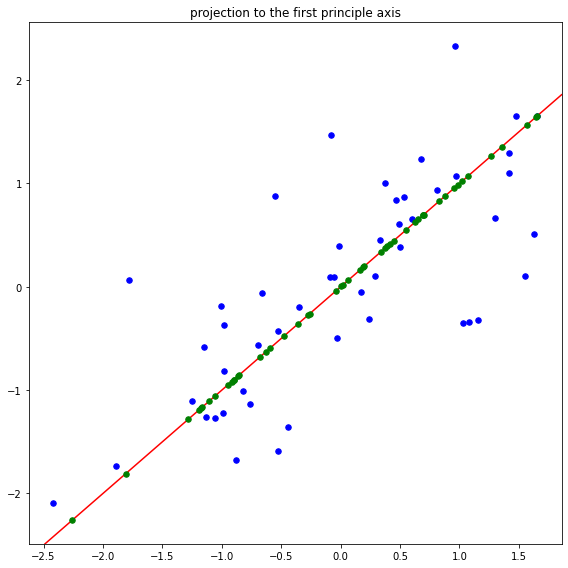

In [211]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')

plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')

proj_Z = compute_projection_onto_line(Z, scaled_U[:,0])
plt.scatter(proj_Z[:,0], proj_Z[:,1], s = 30, color = 'g', zorder=2)

plt.axline((0,0), scaled_U[:,0], color='r', zorder=1)

plt.tight_layout()
plt.show()

## project to the second principal axis

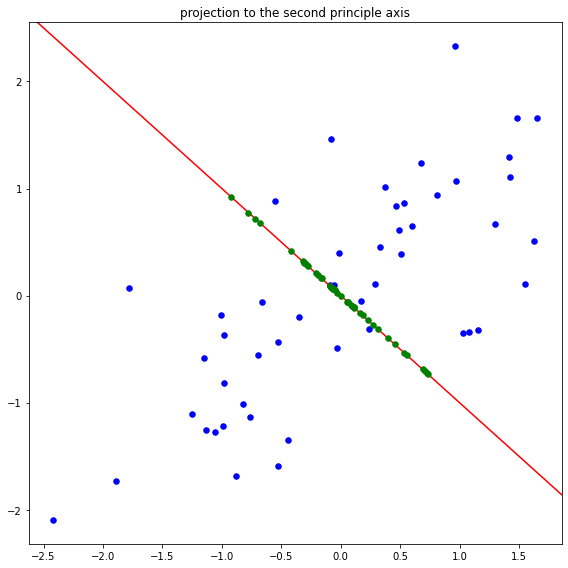

In [214]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')

plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')

proj_Z = compute_projection_onto_line(Z, scaled_U[:,1])
plt.scatter(proj_Z[:,0], proj_Z[:,1], s = 30, color = 'g', zorder=2)

plt.axline((0,0), scaled_U[:,1], color='r', zorder=1)

plt.tight_layout()
plt.show()

## connect original data to the projection onto the first principal axis

In [224]:
for i, j in zip(Z, proj_Z):
    print(i,j)

[-0.5233151  -1.59279489] [-1.058055 -1.058055]
[0.46381907 0.84034673] [0.6520829 0.6520829]
[-1.14839444 -0.58316356] [-0.865779 -0.865779]
[-1.0540573  -1.27072124] [-1.16238927 -1.16238927]
[-0.98402134 -0.8165806 ] [-0.90030097 -0.90030097]
[-0.0849036   1.46633237] [0.69071439 0.69071439]
[-0.4421533  -1.35221189] [-0.8971826 -0.8971826]
[1.65512791 1.65623047] [1.65567919 1.65567919]
[-0.05199109  0.09440519] [0.02120705 0.02120705]
[0.49306315 0.61245716] [0.55276016 0.55276016]
[0.50359481 0.38972985] [0.44666233 0.44666233]
[0.32935312 0.45242712] [0.39089012 0.39089012]
[ 0.17431471 -0.04749279] [0.06341096 0.06341096]
[ 1.08057125 -0.33689517] [0.37183804 0.37183804]
[-0.99325269 -1.21879266] [-1.10602267 -1.10602267]
[1.41742932 1.29234548] [1.3548874 1.3548874]
[0.60026562 0.65385394] [0.62705978 0.62705978]
[-0.98061987 -0.37147145] [-0.67604566 -0.67604566]
[0.96523968 2.32982142] [1.64753055 1.64753055]
[ 1.02758572 -0.35168114] [0.33795229 0.33795229]
[1.47948257 1.65

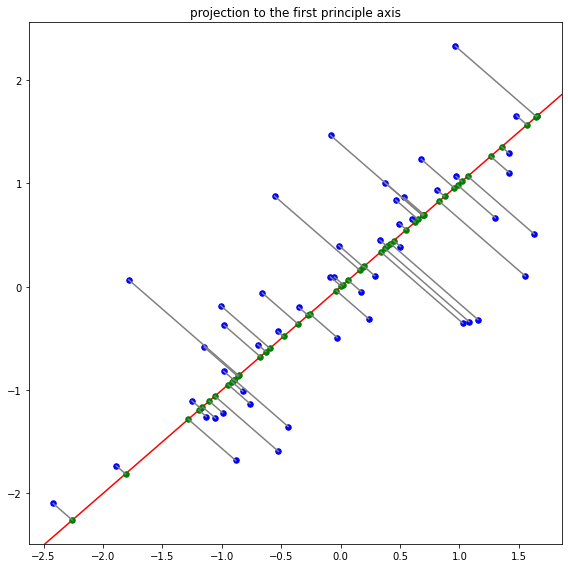

In [225]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')

plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')

proj_Z = compute_projection_onto_line(Z, scaled_U[:,0])
plt.scatter(proj_Z[:,0], proj_Z[:,1], s = 30, color = 'g', zorder=2)

plt.axline((0,0), scaled_U[:,0], color='r', zorder=1)

for i, j in zip(Z, proj_Z):
    plt.plot([i[0], j[0]], [i[1], j[1]], c='gray')

plt.tight_layout()
plt.show()

## connect original data to the projection onto the second principal axis

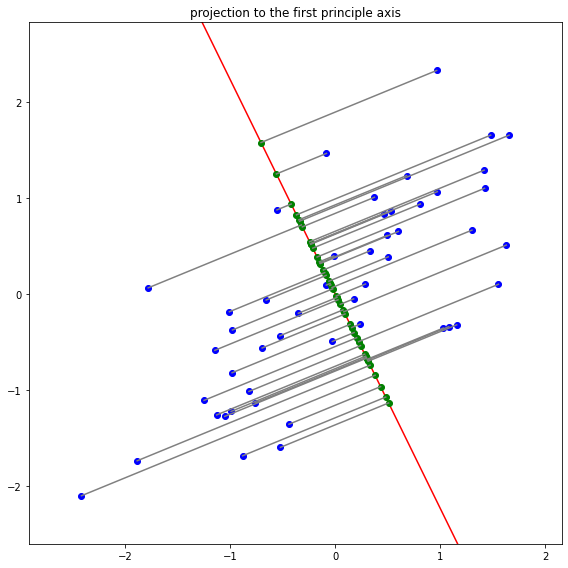

In [25]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

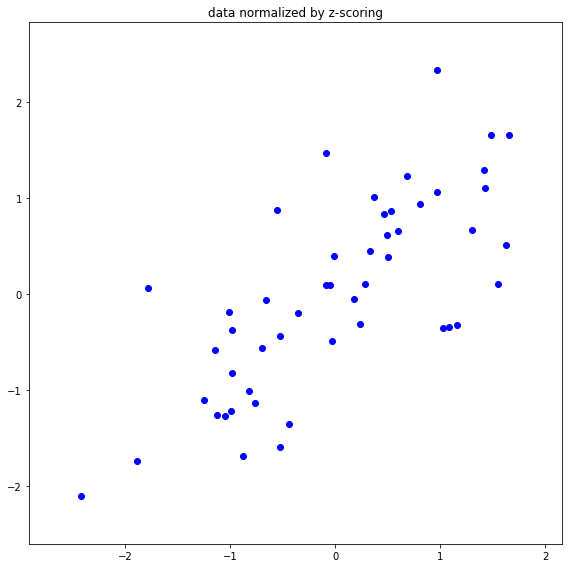

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

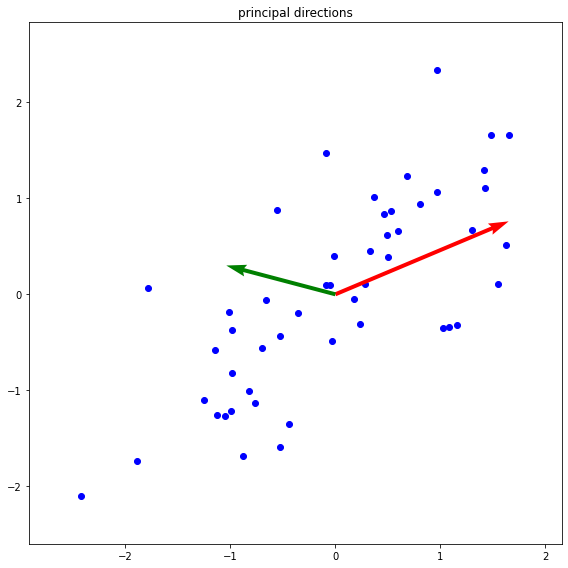

***

### 3. plot the first principal axis in red on the normalized data in blue

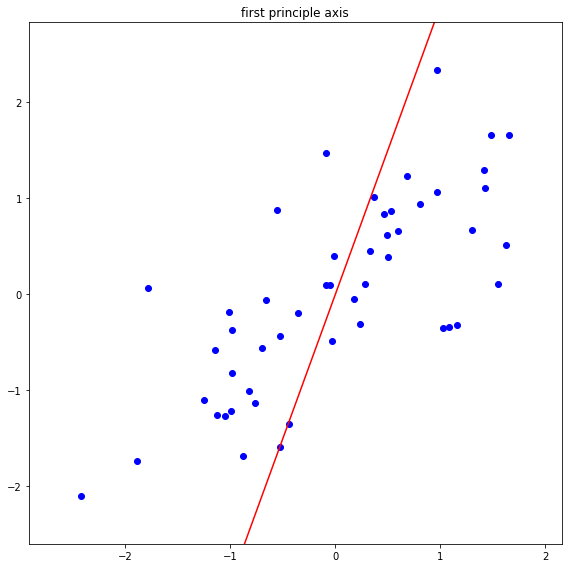

***

### 4. plot the second principal axis in red on the normalized data in blue

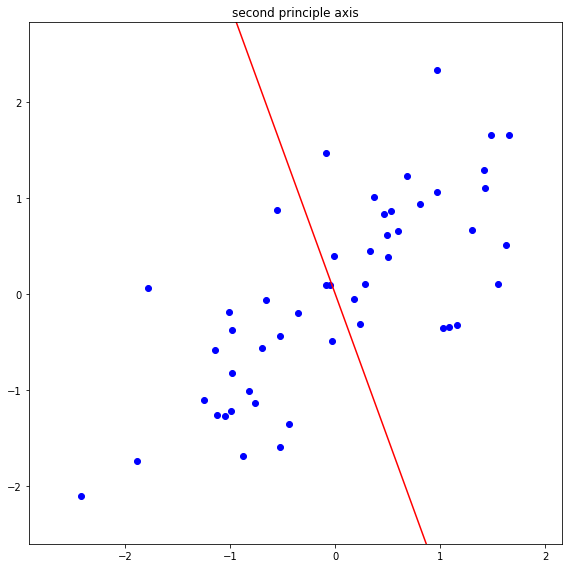

***

### 5. plot the projection of data in green onto the first principal axis in red

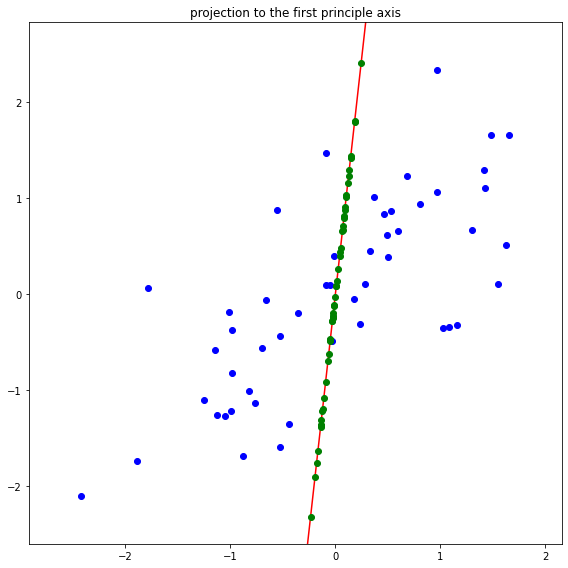

***

### 6. plot the projection of data in green onto the second principal axis in red

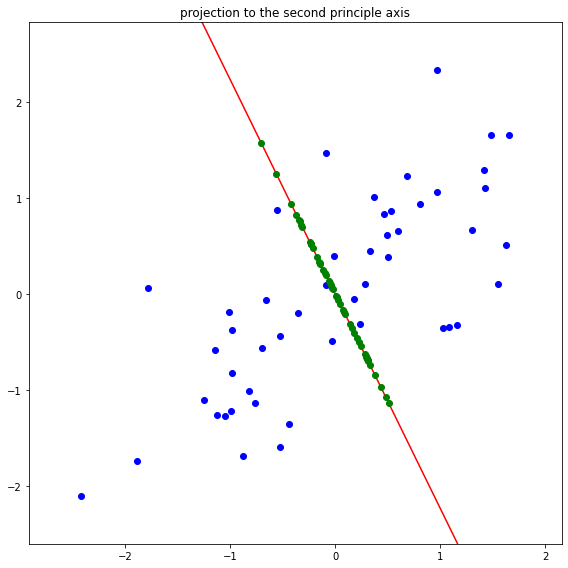

***

### 7. plot the projection line in grey onto the first principal axis

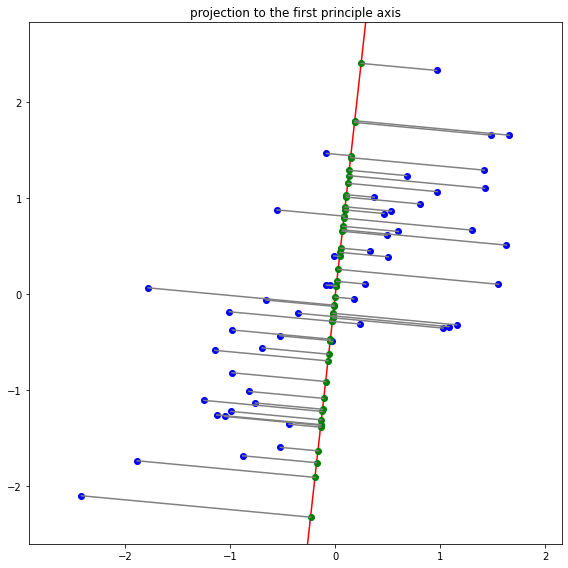

***

### 8. plot the projection line in grey onto the second principal axis

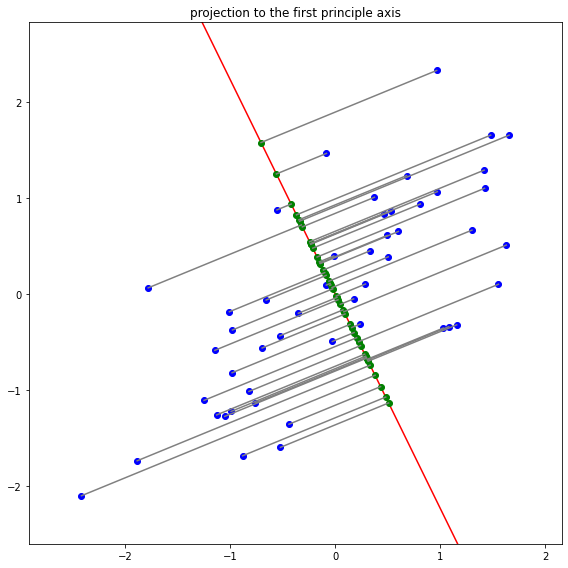

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***